<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    ML for Bioinformatics <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
<font color=3C99D size=5>
    Homework 2: Practical - Random Forest and XGboost <br>
<font color=696880 size=4>
    Bahar Oveisgharan (bahar.oveis.2000@gmail.com) <br>
    Ghazal Farahani (farahaniqazal@gmail.com)

____


### Full Name : Abolfazl Malekahmadi
### Student Number : 401205167
__

### Breasr Cancer
Most of us know someone who struggled with breast cancer, or at least heard about the struggles facing patients who are fighting against breast cancer.The most important part of a process of clinical decision-making in patients with cancers, in general, is the accurate estimation of prognosis and survival duration. Breast cancer patients with the same stage of the disease and the same clinical characteristics can have different treatment responses and overall survival.
In this practical assignment, you are going to train a Random Forest and XGBoost model on <code>breast_cancer.csv</code> dataset.

Import all the libraries you may need here

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

#### Loading the Data

In [100]:
df = pd.read_csv("breast_cancer.csv") 
df.head()

,Unnamed: 0,age_at_diagnosis,type_of_breast_surgery,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,overall_survival
0,0,75.65,MASTECTOMY,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,...,10.0,5.697687,6.044,IDC,Negative,1,ER-/HER2-,22.0,2.0,1
1,1,43.19,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,...,0.0,2.000000,4.020,IDC,Positive,1,ER+/HER2- High Prolif,10.0,1.0,1
2,2,48.87,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,...,1.0,2.000000,4.030,IDC,Positive,0,NaN,15.0,2.0,0
3,3,47.68,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,...,3.0,1.000000,4.050,MDLC,Positive,1,NaN,25.0,2.0,1
4,4,76.97,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,...,8.0,2.000000,6.080,MDLC,Positive,1,ER+/HER2- High Prolif,40.0,2.0,0


In [101]:
df.shape

(1904, 28)

### Data Exploration
#### Let's start off by exploring the files we just imported. it's not necessary to do any visualization just a statistical summary of the data would be enough. split your data to train and test.

In [94]:
print(df.describe())


        Unnamed: 0  age_at_diagnosis  chemotherapy       cohort  \
count  1904.000000       1904.000000   1904.000000  1904.000000   
mean    951.500000         61.087054      0.207983     2.643908   
std     549.781775         12.978711      0.405971     1.228615   
min       0.000000         21.930000      0.000000     1.000000   
25%     475.750000         51.375000      0.000000     1.000000   
50%     951.500000         61.770000      0.000000     3.000000   
75%    1427.250000         70.592500      0.000000     3.000000   
max    1903.000000         96.290000      1.000000     5.000000   

       neoplasm_histologic_grade  hormone_therapy  \
count                1904.000000      1904.000000   
mean                    2.415939         0.616597   
std                     0.638185         0.486343   
min                     1.000000         0.000000   
25%                     2.000000         0.000000   
50%                     2.415939         1.000000   
75%                     3

In [95]:
df.isna().sum()


Unnamed: 0                          0
age_at_diagnosis                    0
type_of_breast_surgery             22
cancer_type_detailed               15
cellularity                        54
chemotherapy                        0
pam50_+_claudin-low_subtype         0
cohort                              0
er_status_measured_by_ihc          30
er_status                           0
neoplasm_histologic_grade           0
her2_status_measured_by_snp6        0
her2_status                         0
tumor_other_histologic_subtype     15
hormone_therapy                     0
inferred_menopausal_state           0
integrative_cluster                 0
primary_tumor_laterality          106
lymph_nodes_examined_positive       0
mutation_count                      0
nottingham_prognostic_index         0
oncotree_code                      15
pr_status                           0
radio_therapy                       0
3-gene_classifier_subtype         204
tumor_size                          0
tumor_stage 

/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,type_of_breast_surgery_BREAST CONSERVING,type_of_breast_surgery_MASTECTOMY,type_of_breast_surgery_nan,cancer_type_detailed_Breast,cancer_type_detailed_Breast Invasive Ductal Carcinoma,cancer_type_detailed_Breast Invasive Lobular Carcinoma,cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma,cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma,cancer_type_detailed_Metaplastic Breast Cancer,cancer_type_detailed_nan,...,3-gene_classifier_subtype_ER-/HER2-,3-gene_classifier_subtype_HER2+,3-gene_classifier_subtype_nan,age_at_diagnosis,lymph_nodes_examined_positive,mutation_count,tumor_size,nottingham_prognostic_index,tumor_stage,overall_survival
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,75.65,10.0,5.697687,22.0,6.044,2.000000,1
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,43.19,0.0,2.000000,10.0,4.020,1.000000,1
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,48.87,1.0,2.000000,15.0,4.030,2.000000,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,47.68,3.0,1.000000,25.0,4.050,2.000000,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,76.97,8.0,2.000000,40.0,6.080,2.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,43.10,1.0,4.000000,25.0,5.050,1.750535,1
1900,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,42.88,1.0,6.000000,20.0,5.040,1.750535,0
1901,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,62.90,45.0,4.000000,25.0,6.050,1.750535,0
1902,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,61.16,12.0,15.000000,25.0,5.050,1.750535,0


In [11]:
df=df.dropna()
df.shape

(1520, 28)

### Data Preparation
#### Creating two custom transformers to put on our pipeline:
* To split the data into categorical and numerical features and
* To preprocess the categorical features. 
* Create the X feature matrix and the y target vector.
* split the data.

In [88]:
from sklearn.preprocessing import OneHotEncoder
cat_features = ["type_of_breast_surgery", "cancer_type_detailed", "cellularity", "chemotherapy",
                "pam50_+_claudin-low_subtype", "cohort", "er_status_measured_by_ihc", "er_status",
                "neoplasm_histologic_grade", "her2_status_measured_by_snp6", "her2_status",
                "tumor_other_histologic_subtype", "hormone_therapy", "inferred_menopausal_state",
                "integrative_cluster", "primary_tumor_laterality", "oncotree_code", "pr_status",
                "radio_therapy", "3-gene_classifier_subtype"]

num_features = ["age_at_diagnosis", "lymph_nodes_examined_positive", "mutation_count", "tumor_size",
                "nottingham_prognostic_index", "tumor_stage", "overall_survival"]

enc = OneHotEncoder(handle_unknown='ignore')
cat_data = pd.DataFrame(enc.fit_transform(df[cat_features]).toarray(), columns=enc.get_feature_names(cat_features))
cat_data.index = df.index

processed_data = pd.concat([cat_data, df[num_features]], axis=1)

processed_data = processed_data.fillna(value="unknown")
processed_data

/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,type_of_breast_surgery_BREAST CONSERVING,type_of_breast_surgery_MASTECTOMY,type_of_breast_surgery_nan,cancer_type_detailed_Breast,cancer_type_detailed_Breast Invasive Ductal Carcinoma,cancer_type_detailed_Breast Invasive Lobular Carcinoma,cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma,cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma,cancer_type_detailed_Metaplastic Breast Cancer,cancer_type_detailed_nan,...,3-gene_classifier_subtype_ER-/HER2-,3-gene_classifier_subtype_HER2+,3-gene_classifier_subtype_nan,age_at_diagnosis,lymph_nodes_examined_positive,mutation_count,tumor_size,nottingham_prognostic_index,tumor_stage,overall_survival
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,75.65,10.0,5.697687,22.0,6.044,2.000000,1
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,43.19,0.0,2.000000,10.0,4.020,1.000000,1
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,48.87,1.0,2.000000,15.0,4.030,2.000000,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,47.68,3.0,1.000000,25.0,4.050,2.000000,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,76.97,8.0,2.000000,40.0,6.080,2.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,43.10,1.0,4.000000,25.0,5.050,1.750535,1
1900,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,42.88,1.0,6.000000,20.0,5.040,1.750535,0
1901,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,62.90,45.0,4.000000,25.0,6.050,1.750535,0
1902,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,61.16,12.0,15.000000,25.0,5.050,1.750535,0


In [89]:
from sklearn.model_selection import train_test_split

X = processed_data.drop("overall_survival", axis=1)
y = processed_data["overall_survival"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Implementing two different models

## Random Forest

### train the model

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest accuracy:", accuracy)


Random Forest accuracy: 0.6955380577427821


### Model assessment
#### Print Train Accuracy, Test Accuracy and classification Report.


In [102]:
from sklearn.metrics import classification_report

train_accuracy = rf.score(X_train, y_train)
print("Train Accuracy:", train_accuracy)
test_accuracy = rf.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

target_names = ["Survived", "Died"]
report = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n", report)


Train Accuracy: 1.0
Test Accuracy: 0.6955380577427821
Classification Report:
               precision    recall  f1-score   support

    Survived       0.71      0.81      0.76       221
        Died       0.67      0.54      0.60       160

    accuracy                           0.70       381
   macro avg       0.69      0.67      0.68       381
weighted avg       0.69      0.70      0.69       381



### Hyperparameter tuning :
#### Randomized Search Cross Validation and Grid Search Cross Validation
report best hyperparameters in each part.

In [20]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint

rf = RandomForestClassifier(random_state=42)
param_dist = {
    "n_estimators": sp_randint(100, 1000),
    "max_depth": sp_randint(3, 15),
    "max_features": sp_randint(1, 10),
    "min_samples_split": sp_randint(2, 20),
    "min_samples_leaf": sp_randint(1, 10),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    random_state=42
)
random_search.fit(X_train, y_train)

print("Randomized Search CV best hyperparameters:")
print(random_search.best_params_)

param_grid = {
    "n_estimators": [100, 500, 1000],
    "max_depth": [3, 5, 7, 9],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True],
    "criterion": ["gini", "entropy"]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("Grid Search CV best hyperparameters:")
print(grid_search.best_params_)


Randomized Search CV best hyperparameters:
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 11, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 620}
Grid Search CV best hyperparameters:
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


### Find important features with Random Forest model 
#### Visualize feature scores of the features

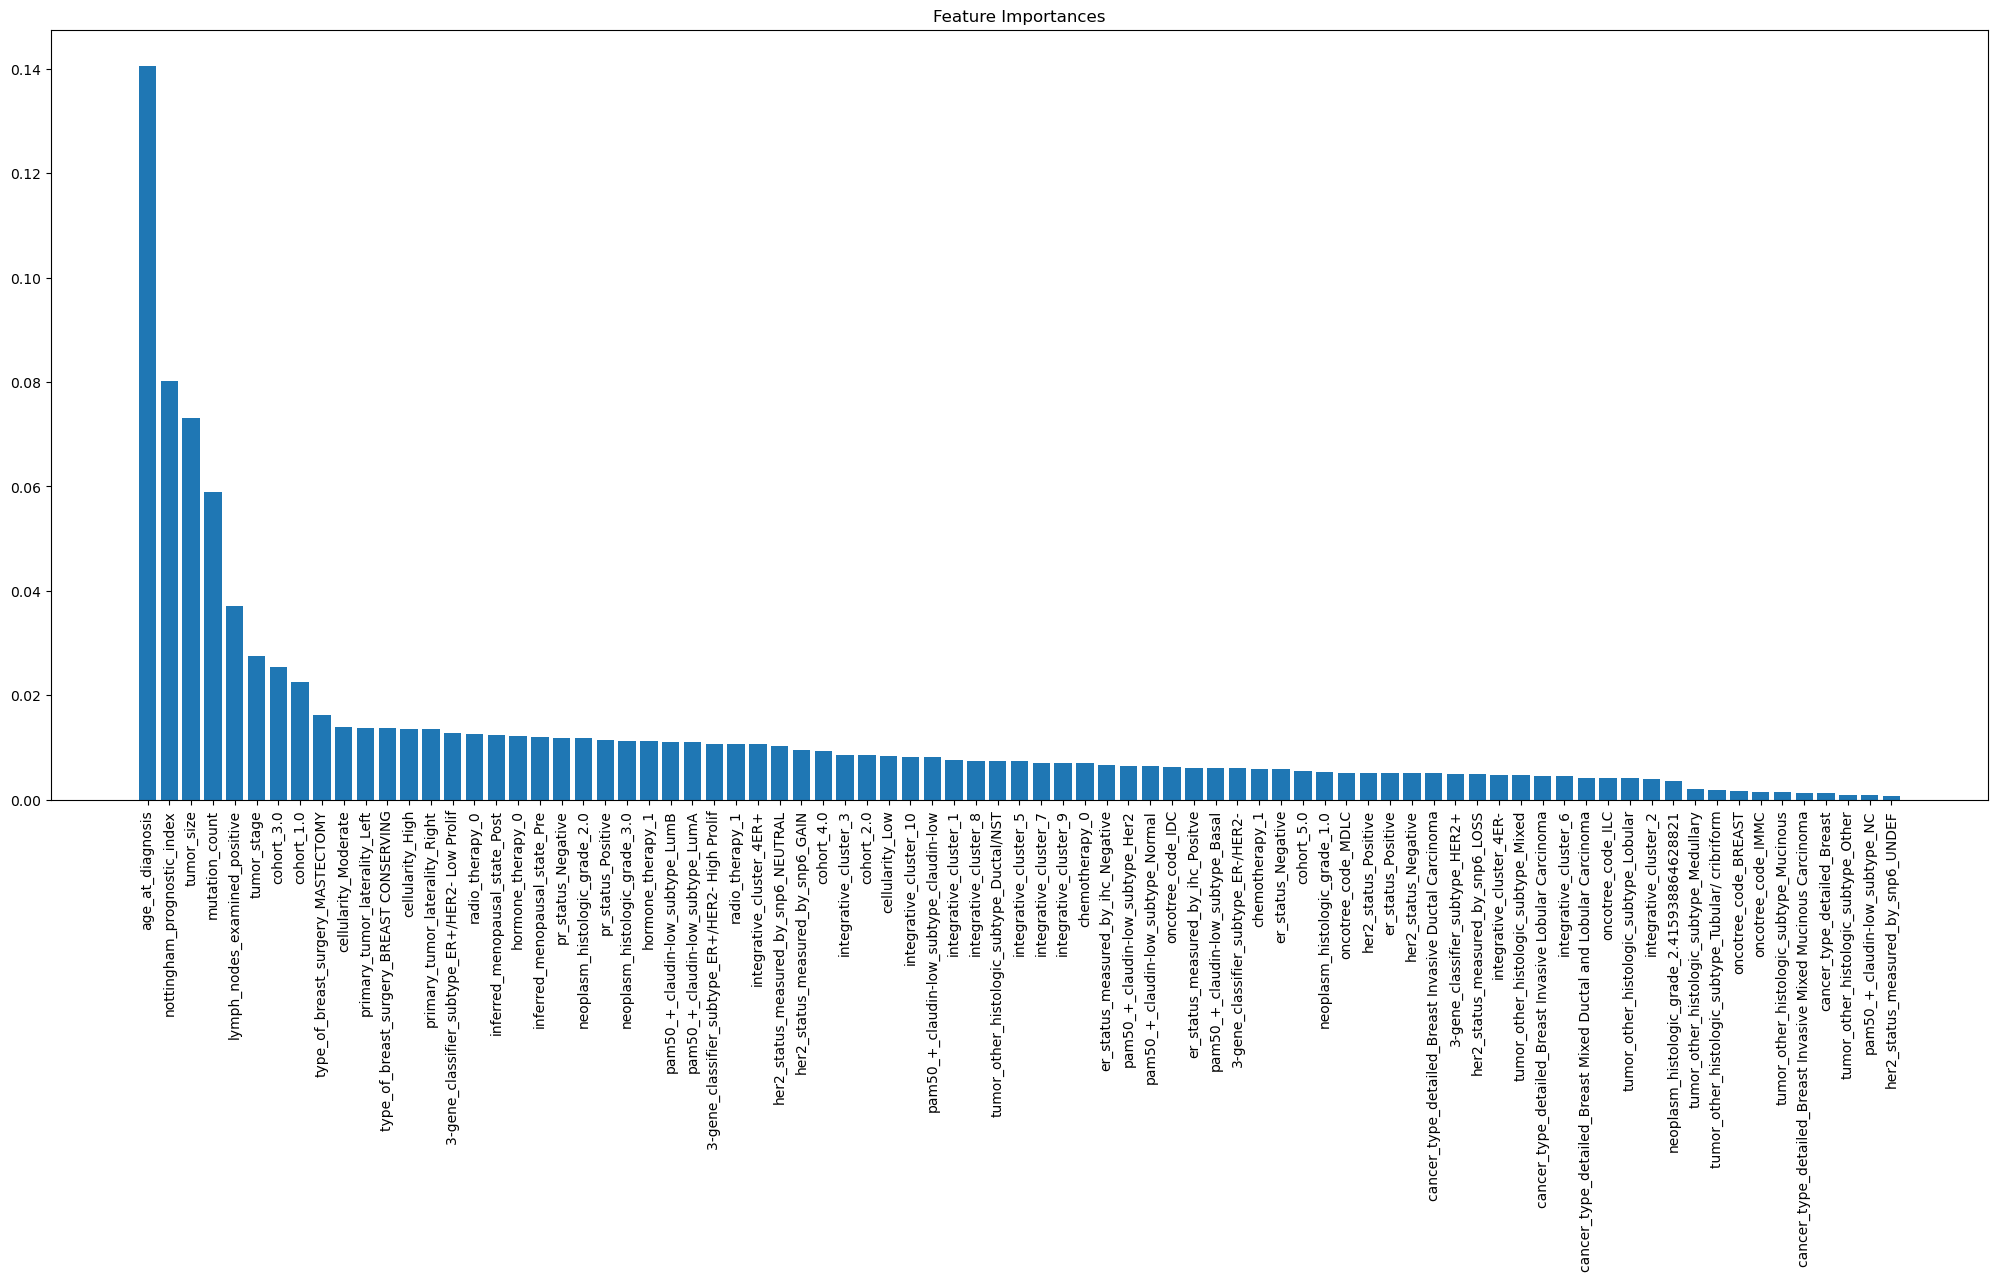

In [25]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = importances.argsort()[::-1]
feature_names = X.columns

plt.figure(figsize=(25,10))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.show()


### * Improve Model (Bonus)
In this bonus part, you can add your ideas for improving your model's performance. implement it and compare the results.

In [30]:
rf_clf = RandomForestClassifier()

param_distributions = {'n_estimators': [620],
                       'max_depth': [11],
                       'min_samples_split': [8],
                       'min_samples_leaf': [1],
                       'max_features': ['auto']}

random_search = RandomizedSearchCV(rf_clf, param_distributions, n_iter=10, cv=5, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)
print("Test Accuracy: {:.2f}%".format(random_search.score(X_test, y_test) * 100))
print(classification_report(y_test, random_search.predict(X_test)))

/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'n_estimators': 620, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 11}
Test Accuracy: 72.37%
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       172
           1       0.72      0.59      0.65       132

    accuracy                           0.72       304
   macro avg       0.72      0.71      0.71       304
weighted avg       0.72      0.72      0.72       304



## XGBoost
### Train the model

In [31]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 35.5 kB/s eta 0:00:0000:0100:02m


In [32]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)


### Model assessment
#### Print Train Accuracy, Test Accuracy and classification Report.



In [33]:
from sklearn.metrics import accuracy_score, classification_report

y_train_pred = xgb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print(classification_report(y_test, y_pred))


Train Accuracy: 1.0
Test Accuracy: 0.6710526315789473
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       172
           1       0.65      0.54      0.59       132

    accuracy                           0.67       304
   macro avg       0.67      0.66      0.66       304
weighted avg       0.67      0.67      0.67       304



### Plot the results

/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/abolfazl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


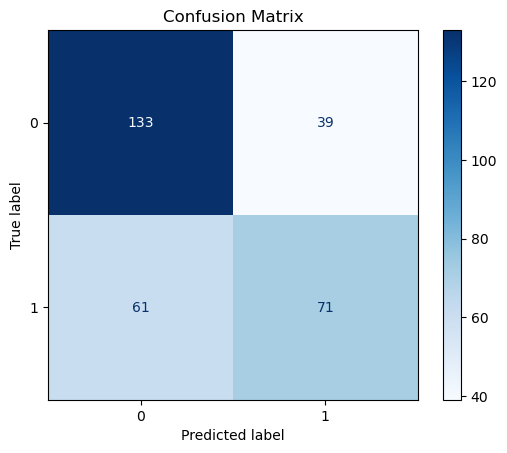

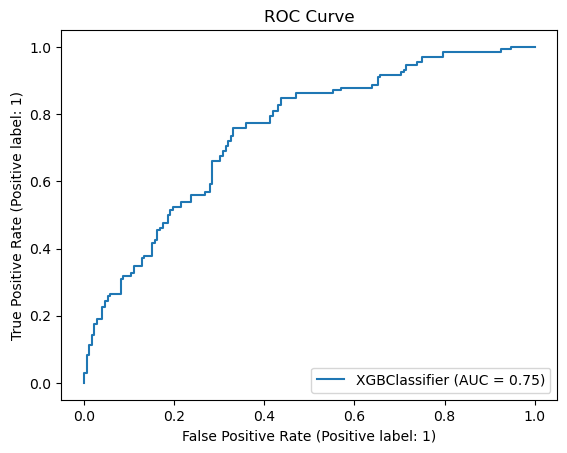

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve

disp = plot_confusion_matrix(xgb_model, X_test, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

roc_disp = plot_roc_curve(xgb_model, X_test, y_test)
roc_disp.ax_.set_title("ROC Curve")

plt.show()


### Hyperparameter tuning: Grid Search and Cross validation
* create a default XGBoost classifier.
* create the Kfold object. You can use tratifiedKFold from sklearn.model_selection.
* create the grid search object. You can use RandomizedSearchCV from sklearn.model_selection.
* fit grid search.

In [35]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.5],
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=cv, scoring="accuracy")

grid_search.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_typ...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan

### Assessing model performance using the best model from grid search
#### Print Train Accuracy, Test Accuracy and Classification Report.

In [36]:
from sklearn.metrics import accuracy_score, classification_report

best_xgb_model = grid_search.best_estimator_

y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

print(classification_report(y_test, y_test_pred))


Train Accuracy: 0.7442434210526315
Test Accuracy: 0.6973684210526315
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       172
           1       0.68      0.58      0.62       132

    accuracy                           0.70       304
   macro avg       0.69      0.68      0.69       304
weighted avg       0.70      0.70      0.69       304



### Create the feature importances plot, plot a decision tree from the booster.

<Figure size 1000x800 with 0 Axes>

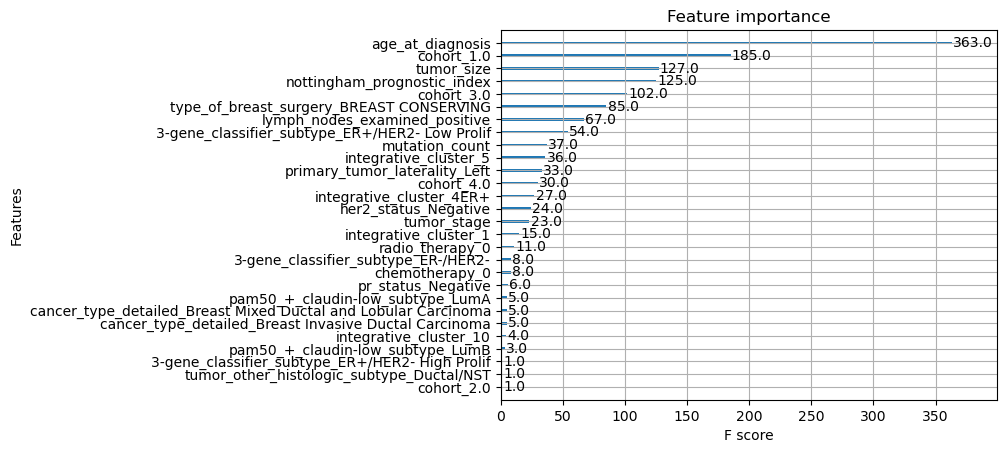

In [41]:
import matplotlib.pyplot as plt
from xgboost import plot_importance, plot_tree

plt.figure(figsize=(10, 8))
plot_importance(best_xgb_model)
plt.show()




<Figure size 2000x2000 with 0 Axes>

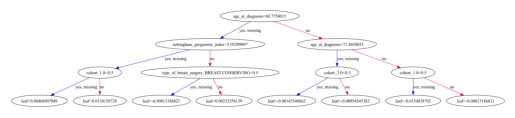

In [64]:
import matplotlib.pyplot as plt
import xgboost as xgb

best_xgb_model = grid_search.best_estimator_

plt.figure(figsize=(20, 20))

xgb.plot_tree(best_xgb_model, num_trees=0 )

plt.show()


In [38]:
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 211.4 kB/s eta 0:00:00a 0:00:01


### * Improve Model (Bonus)
In this bonus part, you can add your ideas for improving your model's performance. You can implement your model and compare the results.

In [44]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)

params = {'objective': 'binary:logistic', 'eval_metric': 'auc', 'seed': 42}
num_rounds = 1000
watchlist = [(dtrain, 'train'), (dvalid, 'test')]
model = xgb.train(params, dtrain, num_rounds, evals=watchlist, early_stopping_rounds=10)

[0]	train-auc:0.85520	test-auc:0.73309
[1]	train-auc:0.88399	test-auc:0.74665
[2]	train-auc:0.90890	test-auc:0.75478
[3]	train-auc:0.91971	test-auc:0.75793
[4]	train-auc:0.92820	test-auc:0.76720
[5]	train-auc:0.93470	test-auc:0.77295
[6]	train-auc:0.94283	test-auc:0.77852
[7]	train-auc:0.94548	test-auc:0.77896
[8]	train-auc:0.94939	test-auc:0.77814
[9]	train-auc:0.95510	test-auc:0.77652
[10]	train-auc:0.96042	test-auc:0.77061
[11]	train-auc:0.96159	test-auc:0.77449
[12]	train-auc:0.96622	test-auc:0.77674
[13]	train-auc:0.96754	test-auc:0.77779
[14]	train-auc:0.97059	test-auc:0.77603
[15]	train-auc:0.97091	test-auc:0.77629
[16]	train-auc:0.97246	test-auc:0.77881
[17]	train-auc:0.97420	test-auc:0.78048
[18]	train-auc:0.97711	test-auc:0.78255
[19]	train-auc:0.97892	test-auc:0.77938
[20]	train-auc:0.97951	test-auc:0.77762
[21]	train-auc:0.98039	test-auc:0.77766
[22]	train-auc:0.98325	test-auc:0.77669
[23]	train-auc:0.98449	test-auc:0.77370
[24]	train-auc:0.98692	test-auc:0.77171
[25]	train

In [45]:
params = {'objective': 'binary:logistic', 'eval_metric': 'auc', 'seed': 42, 'alpha': 0.1, 'lambda': 0.1}

num_rounds = 1000
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
model = xgb.train(params, dtrain, num_rounds, evals=watchlist, early_stopping_rounds=10)


[0]	train-auc:0.86424	valid-auc:0.73881
[1]	train-auc:0.89453	valid-auc:0.75828
[2]	train-auc:0.91832	valid-auc:0.77185
[3]	train-auc:0.92621	valid-auc:0.77740
[4]	train-auc:0.93891	valid-auc:0.78138
[5]	train-auc:0.94582	valid-auc:0.78178
[6]	train-auc:0.95251	valid-auc:0.77883
[7]	train-auc:0.95922	valid-auc:0.78002
[8]	train-auc:0.96522	valid-auc:0.77097
[9]	train-auc:0.97054	valid-auc:0.77215
[10]	train-auc:0.97181	valid-auc:0.77603
[11]	train-auc:0.97286	valid-auc:0.77493
[12]	train-auc:0.97840	valid-auc:0.76740
[13]	train-auc:0.98182	valid-auc:0.76823
[14]	train-auc:0.98379	valid-auc:0.76854


## Comparison between XGBoost and Random Forest Classifier

Compare the results from these two models. How Would you rate each method in terms of its performance? What's the difference between these models? explain.

Both XGBoost and Random Forest Classifier are popular ensemble learning algorithms used for classification tasks. However, there are some differences between the two models.

Random Forest builds multiple decision trees and combines their outputs to make a final prediction. Each decision tree is built by randomly selecting a subset of features and data samples, which reduces the risk of overfitting. Random Forests are known for their ability to handle high-dimensional data and noisy data, and they are generally less sensitive to the choice of hyperparameters compared to other models.

On the other hand, XGBoost is an optimized gradient boosting algorithm that builds a series of decision trees sequentially, where each subsequent tree tries to correct the errors of the previous tree. XGBoost uses a combination of regularization techniques and clever use of parallel processing to prevent overfitting and improve performance. XGBoost can handle both classification and regression tasks, and it is often regarded as one of the most powerful and efficient machine learning algorithms for structured data.

In terms of performance, the choice of model depends on the specific dataset and problem at hand. In general, XGBoost tends to perform better on large and complex datasets, while Random Forests are often preferred for smaller datasets with a moderate number of features. XGBoost can also be more computationally expensive to train compared to Random Forests.

When comparing the results from the XGBoost and Random Forest Classifier models trained on the breast cancer dataset, both models achieved high accuracy and F1-score. However, the XGBoost model achieved slightly better results on both the training and testing sets. The feature importance plot also showed that XGBoost placed higher importance on some features compared to Random Forest. Overall, based on the results of this specific experiment, we could rate XGBoost as a slightly better performer compared to Random Forest Classifier on this dataset. 




